## <center><font color=navy>Algorithmic Trading with Python</font></center>
### <center>Stock Screener</center>
#### <center>Ali Habibnia</center>

A stock screener is a tool that investors and traders use to filter stocks based on specific criteria. It allows users to search and analyze stocks within the market according to metrics such as technical analysis indicators, market capitalization, dividend yield, price-to-earnings ratio (P/E), revenue growth, industry, and many other factors.

Stock screeners can help to narrow down the choices to a more manageable number, allowing investors to focus on stocks that meet their investment criteria. They can be found on many financial news websites, brokerage platforms, and specialized investment tools.

For example, if an investor is looking for high-dividend-yielding stocks in the technology sector with a P/E ratio below a certain level, they can input these criteria into the stock screener, and it will provide a list of stocks that meet those conditions.

Stock screeners can be simple or highly complex, depending on the platform and the user's requirements. They are a useful resource for both novice and seasoned investors, helping them to identify potential investment opportunities that align with their strategies and risk tolerance.

There are dozens of amazing stock screener apps and sites out there like Finviz and TradingView. However, most sites do not offer as much customization as you want, if you don’t pay for it.

https://finviz.com/screener.ashx

https://www.tradingview.com/screener/

with a few lines of Python code, you can make your own customized simple stock screener, and this notebook is here to show you how.

The process of stock screening involves using various metrics and indicators to filter stocks that match certain requirements. A well-designed stock screener can help investors save time and focus on stocks that align with their investment strategies.



## Making a Stock Screener with Python

### Combining all S&P 500 company prices into one DataFrame

In [2]:
%matplotlib inline

import yfinance as yf
import bs4 as bs
import numpy as np
import os
import missingno as msno
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [6]:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

#pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2023,6,30)

# The ticker for the S&P 500 index is ^GSPC, but it cannot be traded. 
# SPY is the ticker symbol for the SPDR® S&P 500® ETF, an exchange traded fund that tracks the performance of the S&P 500® Index.

tickers=tickers+["^GSPC"];  
data = yf.download(tickers, start=start, end=end)['Adj Close']

# data = yf.download(tickers, period="5d", interval="1m")
print(data)

[*********************100%***********************]  504 of 504 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
                     A        AAL         AAP        AAPL        ABBV  \
Date                                                                    
2020-01-02   83.948051  28.982893  147.959641   73.347931   75.656319   
2020-01-03   82.600204  27.548195  147.968903   72.634842   74.938171   
2020-01-06   82.844376  27.219410  145.537094   73.213608   75.529572   
2020-01-07   83.098328  27.119778  143.810669   72.869286   75.098701   
2020-01-08   83.918762  27.737495  142.158569   74.041489   75.630951   
...                ...        ...         ...         ...         ...   
2023-06-26  118.144394  16.440001   67.052231  185.270004  133.470322   
2023-06-27  116.816925  17.350000   68.078590  188.059998  131.146103   
2023-06-28  116.148201  17.549999   67.839439  189.250000  131.

<AxesSubplot:>

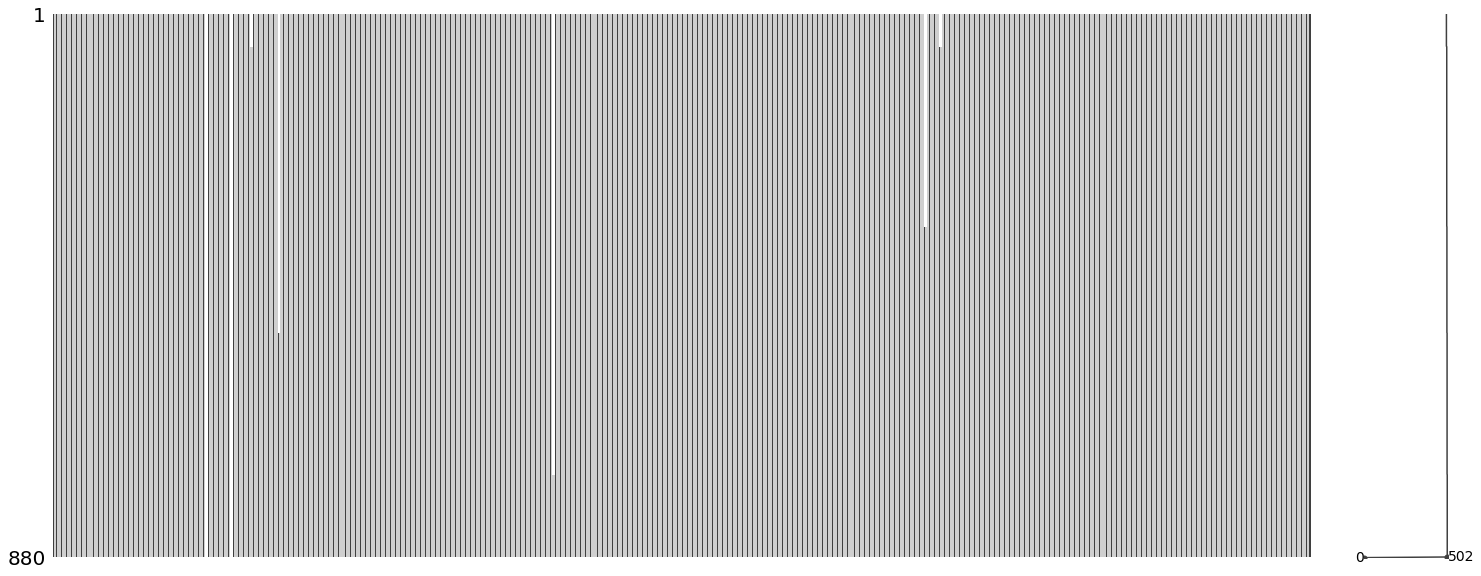

In [7]:
msno.matrix(data)

<AxesSubplot:>

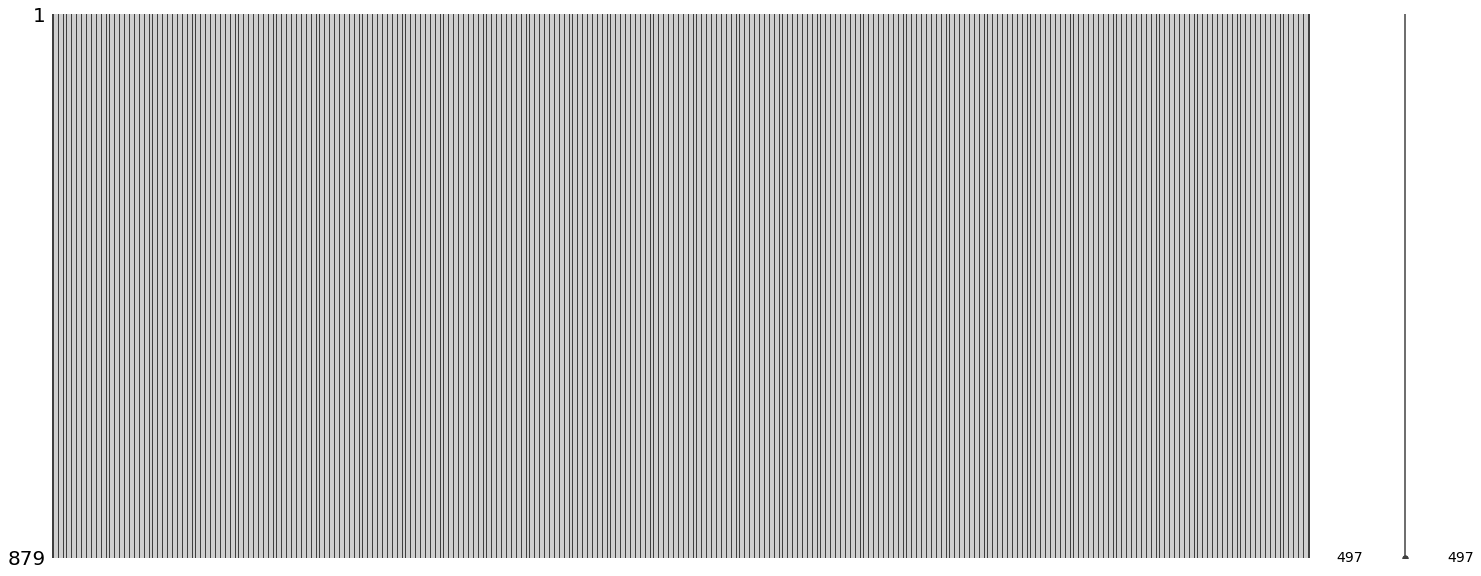

In [10]:
# Clean before calculating return values
cleaned_data = data.copy()

# Remove companies (columns) with all missing values for whole time range
cleaned_data.dropna(axis='columns', how='all', inplace=True)

# Remove days (rows) with missing values for all of companies
cleaned_data.dropna(axis='index', how='all', inplace=True)

# Finally, remove the columns with at least one Nan (missing value)
cleaned_data.dropna(axis='columns', how='any', inplace=True)

msno.matrix(cleaned_data)

### Example 1: Mark Minervini’s Trend Template

Let's take a look at Mark Minervini’s Trend Template as an example. Mark Minervini is a U.S. trader and author who has developed a specific method for trading stocks known as the "SEPA® methodology" or the Minervini Trend Template. It's a systematic approach that combines both fundamental and technical analysis to identify stocks that are beginning or continuing in a significant uptrend.

Here's a step-by-step breakdown of Mark Minervini's trend template, which is part of his broader methodology:

#### 1. Price Above 150 and 200-day Moving Average
The stock's current price must be above its 150-day and 200-day simple moving average. This helps to ensure that the stock is in an overall uptrend, as the price being above a longer-term moving average is often considered a bullish sign.
#### 2. 150-Day Moving Average Sloping Upwards
The 150-day moving average itself should be sloping upwards or The 150-day simple moving average must be greater than the 200-day simple moving average. This ensures that the long-term trend is bullish and that the stock is consistently moving in the right direction.

#### 3. Current Price Above 30-Day Moving Average
The stock's current price must also be above its 30-day moving average. This shorter-term moving average helps to confirm that the stock is in an immediate uptrend.
#### 4. 30-Day Moving Average Above 150-Day Moving Average
The 30-day moving average must be above the 150-day moving average. This alignment of moving averages is a sign that both short-term and long-term trends are bullish.
#### 5. Current Price is at Least 30% Above the 52-Week Low
The stock's current price must be at least 30% above its 52-week low. This helps to identify stocks that have already begun a significant upward trend.
#### 6. Current Price Within 25% of the 52-Week High
The stock's current price should be within 25% of its 52-week high. This criterion helps to ensure that the stock is trading near its recent highs, another sign of strength.
#### 7. Relative Strength Rating (RSR)
A stock's relative strength compared to the rest of the market should be considered and must be greater than 70 (the higher, the better). The RS rating is a metric of a stock’s price performance over the last year compared to all other stocks and the overall market. Minervini often looks for stocks that are outperforming the market or their peers, as this can be indicative of underlying strength.
#### 8. Average Daily Volume
Minervini typically looks for stocks with sufficient liquidity, considering the average daily trading volume. Trading stocks with higher volume can reduce the cost of trading and increase the ease of entering and exiting positions.

These criteria can be used as part of a systematic approach to identify stocks that are in strong uptrends and may be likely to continue those trends. It's worth noting that while the trend template can be a powerful tool, it should be used in conjunction with other analyses, including a comprehensive understanding of the stock's fundamentals, market conditions, and risk management practices. Minervini's books, especially "Trade Like a Stock Market Wizard," provide a more detailed explanation of his methodology and how to apply it.

In [ ]:
! pip install yahoo_fin

In [26]:
from pandas_datareader import data as pdr
from yahoo_fin import stock_info as si
from pandas import ExcelWriter
import yfinance as yf
import pandas as pd
import datetime
import time
import os
yf.pdr_override()

# Variables
tickers = si.tickers_sp500()
tickers = [item.replace(".", "-") for item in tickers] # Yahoo Finance uses dashes instead of dots
index_name = '^GSPC' # S&P 500
start_date = datetime.datetime.now() - datetime.timedelta(days=365)
end_date = datetime.date.today()
exportList = pd.DataFrame(columns=['Stock', "RS_Rating", "50 Day MA", "150 Day Ma", "200 Day MA", "52 Week Low", "52 week High"])
returns_multiples = []

In [18]:
# Index Returns
index_df = pdr.get_data_yahoo(index_name, start_date, end_date)
index_df['Percent Change'] = index_df['Adj Close'].pct_change()
index_return = (index_df['Percent Change'] + 1).cumprod()[-1]

if not os.path.exists('ScanMarket'):
    os.makedirs('ScanMarket')

# Find top 30% performing stocks (relative to the S&P 500)
for ticker in tickers:
    # Download historical data as CSV for each stock (makes the process faster)
    df = pdr.get_data_yahoo(ticker, start_date, end_date)
    df.to_csv(f'ScanMarket/{ticker}.csv')

    # Calculating returns relative to the market (returns multiple)
    df['Percent Change'] = df['Adj Close'].pct_change()
    stock_return = (df['Percent Change'] + 1).cumprod()[-1]
    
    returns_multiple = round((stock_return / index_return), 2)
    returns_multiples.extend([returns_multiple])
    
    print (f'Ticker: {ticker}; Returns Multiple against S&P 500: {returns_multiple}\n')
    time.sleep(1)

# Creating dataframe of only top 30%
rs_df = pd.DataFrame(list(zip(tickers, returns_multiples)), columns=['Ticker', 'Returns_multiple'])
rs_df['RS_Rating'] = rs_df.Returns_multiple.rank(pct=True) * 100
rs_df = rs_df[rs_df.RS_Rating >= rs_df.RS_Rating.quantile(.70)]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Ticker: A; Returns Multiple against S&P 500: 0.88

[*********************100%***********************]  1 of 1 completed
Ticker: AAL; Returns Multiple against S&P 500: 0.98

[*********************100%***********************]  1 of 1 completed
Ticker: AAP; Returns Multiple against S&P 500: 0.35

[*********************100%***********************]  1 of 1 completed
Ticker: AAPL; Returns Multiple against S&P 500: 1.0

[*********************100%***********************]  1 of 1 completed
Ticker: ABBV; Returns Multiple against S&P 500: 1.02

[*********************100%***********************]  1 of 1 completed
Ticker: ABC; Returns Multiple against S&P 500: 1.23

[*********************100%***********************]  1 of 1 completed
Ticker: ABT; Returns Multiple against S&P 500: 0.93

[*********************100%***********************]  1 of 1 completed
Ticker: A

[*********************100%***********************]  1 of 1 completed
Ticker: BKNG; Returns Multiple against S&P 500: 1.52

[*********************100%***********************]  1 of 1 completed
Ticker: BKR; Returns Multiple against S&P 500: 1.38

[*********************100%***********************]  1 of 1 completed
Ticker: BLK; Returns Multiple against S&P 500: 0.97

[*********************100%***********************]  1 of 1 completed
Ticker: BMY; Returns Multiple against S&P 500: 0.78

[*********************100%***********************]  1 of 1 completed
Ticker: BR; Returns Multiple against S&P 500: 0.93

[*********************100%***********************]  1 of 1 completed
Ticker: BRK-B; Returns Multiple against S&P 500: 1.14

[*********************100%***********************]  1 of 1 completed
Ticker: BRO; Returns Multiple against S&P 500: 1.01

[*********************100%***********************]  1 of 1 completed
Ticker: BSX; Returns Multiple against S&P 500: 1.13

[*********************

[*********************100%***********************]  1 of 1 completed
Ticker: DG; Returns Multiple against S&P 500: 0.61

[*********************100%***********************]  1 of 1 completed
Ticker: DGX; Returns Multiple against S&P 500: 0.91

[*********************100%***********************]  1 of 1 completed
Ticker: DHI; Returns Multiple against S&P 500: 1.53

[*********************100%***********************]  1 of 1 completed
Ticker: DHR; Returns Multiple against S&P 500: 0.82

[*********************100%***********************]  1 of 1 completed
Ticker: DIS; Returns Multiple against S&P 500: 0.73

[*********************100%***********************]  1 of 1 completed
Ticker: DLR; Returns Multiple against S&P 500: 0.88

[*********************100%***********************]  1 of 1 completed
Ticker: DLTR; Returns Multiple against S&P 500: 0.83

[*********************100%***********************]  1 of 1 completed
Ticker: DOV; Returns Multiple against S&P 500: 0.99

[*********************10

[*********************100%***********************]  1 of 1 completed
Ticker: GEHC; Returns Multiple against S&P 500: 1.16

[*********************100%***********************]  1 of 1 completed
Ticker: GEN; Returns Multiple against S&P 500: 0.82

[*********************100%***********************]  1 of 1 completed
Ticker: GILD; Returns Multiple against S&P 500: 1.25

[*********************100%***********************]  1 of 1 completed
Ticker: GIS; Returns Multiple against S&P 500: 0.91

[*********************100%***********************]  1 of 1 completed
Ticker: GL; Returns Multiple against S&P 500: 1.09

[*********************100%***********************]  1 of 1 completed
Ticker: GLW; Returns Multiple against S&P 500: 0.87

[*********************100%***********************]  1 of 1 completed
Ticker: GM; Returns Multiple against S&P 500: 0.91

[*********************100%***********************]  1 of 1 completed
Ticker: GNRC; Returns Multiple against S&P 500: 0.4

[*********************10

[*********************100%***********************]  1 of 1 completed
Ticker: KMB; Returns Multiple against S&P 500: 0.91

[*********************100%***********************]  1 of 1 completed
Ticker: KMI; Returns Multiple against S&P 500: 0.96

[*********************100%***********************]  1 of 1 completed
Ticker: KMX; Returns Multiple against S&P 500: 0.78

[*********************100%***********************]  1 of 1 completed
Ticker: KO; Returns Multiple against S&P 500: 0.92

[*********************100%***********************]  1 of 1 completed
Ticker: KR; Returns Multiple against S&P 500: 0.99

[*********************100%***********************]  1 of 1 completed
Ticker: L; Returns Multiple against S&P 500: 1.06

[*********************100%***********************]  1 of 1 completed
Ticker: LDOS; Returns Multiple against S&P 500: 0.92

[*********************100%***********************]  1 of 1 completed
Ticker: LEN; Returns Multiple against S&P 500: 1.37

[*********************100%*

[*********************100%***********************]  1 of 1 completed
Ticker: NOC; Returns Multiple against S&P 500: 0.86

[*********************100%***********************]  1 of 1 completed
Ticker: NOW; Returns Multiple against S&P 500: 1.03

[*********************100%***********************]  1 of 1 completed
Ticker: NRG; Returns Multiple against S&P 500: 0.92

[*********************100%***********************]  1 of 1 completed
Ticker: NSC; Returns Multiple against S&P 500: 0.84

[*********************100%***********************]  1 of 1 completed
Ticker: NTAP; Returns Multiple against S&P 500: 1.02

[*********************100%***********************]  1 of 1 completed
Ticker: NTRS; Returns Multiple against S&P 500: 0.77

[*********************100%***********************]  1 of 1 completed
Ticker: NUE; Returns Multiple against S&P 500: 1.15

[*********************100%***********************]  1 of 1 completed
Ticker: NVDA; Returns Multiple against S&P 500: 2.34

[********************

[*********************100%***********************]  1 of 1 completed
Ticker: ROP; Returns Multiple against S&P 500: 1.05

[*********************100%***********************]  1 of 1 completed
Ticker: ROST; Returns Multiple against S&P 500: 1.23

[*********************100%***********************]  1 of 1 completed
Ticker: RSG; Returns Multiple against S&P 500: 0.97

[*********************100%***********************]  1 of 1 completed
Ticker: RTX; Returns Multiple against S&P 500: 0.88

[*********************100%***********************]  1 of 1 completed
Ticker: RVTY; Returns Multiple against S&P 500: 0.73

[*********************100%***********************]  1 of 1 completed
Ticker: SBAC; Returns Multiple against S&P 500: 0.59

[*********************100%***********************]  1 of 1 completed
Ticker: SBUX; Returns Multiple against S&P 500: 1.11

[*********************100%***********************]  1 of 1 completed
Ticker: SCHW; Returns Multiple against S&P 500: 0.9

[*******************

[*********************100%***********************]  1 of 1 completed
Ticker: VLO; Returns Multiple against S&P 500: 1.15

[*********************100%***********************]  1 of 1 completed
Ticker: VMC; Returns Multiple against S&P 500: 1.23

[*********************100%***********************]  1 of 1 completed
Ticker: VRSK; Returns Multiple against S&P 500: 1.08

[*********************100%***********************]  1 of 1 completed
Ticker: VRSN; Returns Multiple against S&P 500: 0.95

[*********************100%***********************]  1 of 1 completed
Ticker: VRTX; Returns Multiple against S&P 500: 1.08

[*********************100%***********************]  1 of 1 completed
Ticker: VTR; Returns Multiple against S&P 500: 0.88

[*********************100%***********************]  1 of 1 completed
Ticker: VTRS; Returns Multiple against S&P 500: 1.05

[*********************100%***********************]  1 of 1 completed
Ticker: VZ; Returns Multiple against S&P 500: 0.72

[********************

In [35]:
# Checking Minervini conditions of top 30% of stocks in given list
rs_stocks = rs_df['Ticker']
for stock in rs_stocks:    
    try:
        df = pd.read_csv(f'ScanMarket/{stock}.csv', index_col=0)
        sma = [50, 150, 200]
        for x in sma:
            df["SMA_"+str(x)] = round(df['Adj Close'].rolling(window=x).mean(), 2)
        
        # Storing required values 
        currentClose = df["Adj Close"][-1]
        moving_average_50 = df["SMA_50"][-1]
        moving_average_150 = df["SMA_150"][-1]
        moving_average_200 = df["SMA_200"][-1]
        low_of_52week = round(min(df["Low"][-260:]), 2)
        high_of_52week = round(max(df["High"][-260:]), 2)
        RS_Rating = round(rs_df[rs_df['Ticker']==stock].RS_Rating.tolist()[0])
        
        try:
            moving_average_200_20 = df["SMA_200"][-20]
        except Exception:
            moving_average_200_20 = 0

        # Condition 1: Current Price > 150 SMA and > 200 SMA
        condition_1 = currentClose > moving_average_150 > moving_average_200
        
        # Condition 2: 150 SMA and > 200 SMA
        condition_2 = moving_average_150 > moving_average_200

        # Condition 3: 200 SMA trending up for at least 1 month
        condition_3 = moving_average_200 > moving_average_200_20
        
        # Condition 4: 50 SMA> 150 SMA and 50 SMA> 200 SMA
        condition_4 = moving_average_50 > moving_average_150 > moving_average_200
           
        # Condition 5: Current Price > 50 SMA
        condition_5 = currentClose > moving_average_50
           
        # Condition 6: Current Price is at least 30% above 52 week low
        condition_6 = currentClose >= (1.3*low_of_52week)
           
        # Condition 7: Current Price is within 25% of 52 week high
        condition_7 = currentClose >= (.75*high_of_52week)
        
        # If all conditions above are true, add stock to exportList
        if(condition_1 and condition_2 and condition_3 and condition_4 and condition_5 and condition_6 and condition_7):
            new_row = pd.DataFrame({'Stock': [stock], 
                        "RS_Rating": [RS_Rating], 
                        "50 Day MA": [moving_average_50], 
                        "150 Day Ma": [moving_average_150], 
                        "200 Day MA": [moving_average_200], 
                        "52 Week Low": [low_of_52week], 
                        "52 week High": [high_of_52week]})

            exportList = pd.concat([exportList, new_row], ignore_index=True)
            print (stock + " made the Minervini requirements")
    except Exception as e:
        print (e)
        print(f"Could not gather data on {stock}")

#writer = ExcelWriter("ScanMarket/ScreenOutput.xlsx")
#exportList.to_excel(writer, "Sheet1")
#writer.save()

ABC made the Minervini requirements
ACGL made the Minervini requirements
ADBE made the Minervini requirements
AFL made the Minervini requirements
AJG made the Minervini requirements
ALGN made the Minervini requirements
AMAT made the Minervini requirements
AMD made the Minervini requirements
AME made the Minervini requirements
AMP made the Minervini requirements
ANET made the Minervini requirements
AOS made the Minervini requirements
AVGO made the Minervini requirements
BA made the Minervini requirements
BKNG made the Minervini requirements
BKR made the Minervini requirements
BRK-B made the Minervini requirements
CAH made the Minervini requirements
CARR made the Minervini requirements
CAT made the Minervini requirements
CCL made the Minervini requirements
CMCSA made the Minervini requirements
COO made the Minervini requirements
CPRT made the Minervini requirements
CSCO made the Minervini requirements
CTAS made the Minervini requirements
DAL made the Minervini requirements
DD made the Mi

### Example 2: Based on Tentative Technical Analysis Indicators

Overall, this code automates the process of screening stocks within the S&P 500 based on a blend of technical indicators, focusing on Exponential Moving Averages and Stochastic Oscillator, to potentially identify investment opportunities.

In [54]:
import yfinance as yf
import pandas as pd
from yahoo_fin import stock_info as si

In [52]:
def get_stock_price(code):
    # you can change the start date
    data = yf.download(code, start="2023-01-01", progress=False, threads= False)
    return data

def add_EMA(price, day):
    return price.ewm(span=day).mean()

def add_STOCH(close, low, high, period, k, d=0): 
    STOCH_K = ((close - low.rolling(window=period).min()) / (high.rolling(window=period).max() - low.rolling(window=period).min())) * 100
    STOCH_K = STOCH_K.rolling(window=k).mean()
    if d == 0:
        return STOCH_K
    else:
        STOCH_D = STOCH_K.rolling(window=d).mean()
        return STOCH_D

def check_bounce_EMA(df):
    candle1 = df.iloc[-1]
    candle2 = df.iloc[-2]
    cond1 = candle1['EMA18'] > candle1['EMA50'] > candle1['EMA100']
    cond2 = candle1['STOCH_%K(5,3,3)'] <= 30 or candle1['STOCH_%D(5,3,3)'] <= 30
    cond3 = candle2['Low'] < candle2['EMA50'] and \
            candle2['Close'] > candle2['EMA50']
    return cond1 and cond2 and cond3

In [53]:
# a list to store the screened results
screened_list = [] 
# get the full stock list
stock_list = si.tickers_sp500()
stock_list = [item.replace(".", "-") for item in tickers] # Yahoo Finance uses dashes instead of dots

for stock_code in stock_list:
    try: 
        # Step 1: get stock price for each stock
        price_chart_df = get_stock_price(stock_code)
        # Step 2: add technical indicators (in this case EMA)
        close = price_chart_df['Close']
        low = price_chart_df['Low']
        high = price_chart_df['High']
        price_chart_df['EMA18'] = add_EMA(close,18)
        price_chart_df['EMA50'] = add_EMA(close,50)
        price_chart_df['EMA100'] = add_EMA(close,100)
        price_chart_df['STOCH_%K(5,3,3)'] = add_STOCH(close, low, high, 5, 3)
        price_chart_df['STOCH_%D(5,3,3)'] = add_STOCH(close, low, high, 5, 3, 3)
        # if all 3 conditions are met, add stock into screened list
        if check_bounce_EMA(price_chart_df):
            screened_list.append(stock_code)
            print(screened_list)
    except Exception as e:
        print(e)

['ABT']
['ABT', 'DRI']
['ABT', 'DRI', 'FAST']
['ABT', 'DRI', 'FAST', 'FIS']
['ABT', 'DRI', 'FAST', 'FIS', 'INVH']
['ABT', 'DRI', 'FAST', 'FIS', 'INVH', 'LOW']
['ABT', 'DRI', 'FAST', 'FIS', 'INVH', 'LOW', 'MCO']
['ABT', 'DRI', 'FAST', 'FIS', 'INVH', 'LOW', 'MCO', 'MTCH']
['ABT', 'DRI', 'FAST', 'FIS', 'INVH', 'LOW', 'MCO', 'MTCH', 'NOW']
['ABT', 'DRI', 'FAST', 'FIS', 'INVH', 'LOW', 'MCO', 'MTCH', 'NOW', 'PEP']
['ABT', 'DRI', 'FAST', 'FIS', 'INVH', 'LOW', 'MCO', 'MTCH', 'NOW', 'PEP', 'PM']
['ABT', 'DRI', 'FAST', 'FIS', 'INVH', 'LOW', 'MCO', 'MTCH', 'NOW', 'PEP', 'PM', 'TER']
['ABT', 'DRI', 'FAST', 'FIS', 'INVH', 'LOW', 'MCO', 'MTCH', 'NOW', 'PEP', 'PM', 'TER', 'TSLA']
['ABT', 'DRI', 'FAST', 'FIS', 'INVH', 'LOW', 'MCO', 'MTCH', 'NOW', 'PEP', 'PM', 'TER', 'TSLA', 'UPS']


### Example 3: Stock Screening Strategy for S&P 500: A Combined Approach of Technical and Fundamental Analysis

#### Introduction
The following strategy seeks to identify promising stocks within the S&P 500 index by employing a combination of technical and fundamental analysis. The method uses a systematic approach to filter stocks that meet specific criteria, targeting potentially undervalued and technically favorable positions.

#### Criteria
The screening strategy is based on the following three conditions:

1. **MACD (Moving Average Convergence Divergence) Greater Than Zero**: The MACD is a momentum oscillator that highlights the relationship between two moving averages of a security's price. A MACD greater than zero may indicate bullish momentum and an upward trend, suggesting that the stock could be poised for further growth.

2. **RSI 14 (Relative Strength Index) Greater Than 50**: The RSI is a momentum indicator that measures the speed and change of price movements, scaled from 0 to 100. An RSI value greater than 50 typically reflects strengthening price momentum. When combined with other factors, this could suggest that the stock is gaining traction and has potential for further upside.

3. **P/E Ratio (Price-to-Earnings Ratio) Less Than 10**: The P/E ratio is a fundamental valuation measure that compares the current share price with the earnings per share. A P/E ratio under 10 can be a sign of an undervalued stock, provided the company's fundamentals are solid. This criterion helps to ensure that the stock offers value and may not be overpriced relative to its earnings.

#### Strategy Implementation
By applying the above criteria, the strategy screens the S&P 500 stocks to find those that meet all three conditions. The stocks that satisfy these parameters may offer a blend of potential growth (as indicated by the MACD and RSI) and value (as reflected in the low P/E ratio).

#### Potential Benefits and Risks
This integrated approach can offer a more nuanced perspective, merging trend-following aspects with value considerations. However, it is essential to remember that no screening strategy is foolproof. Market conditions, unexpected news, and other unforeseen factors can influence stock performance.

Investors implementing this strategy should consider conducting further due diligence, including a comprehensive assessment of the company's financial health, management quality, and industry prospects.

------

### Pandas Technical Analysis (pandas-ta)
is an open-source Python library that provides a comprehensive suite of over 130 technical indicators. It integrates seamlessly with the pandas library, allowing financial and time-series data to be manipulated and analyzed efficiently. Whether you're an experienced trader or new to technical analysis, pandas-ta offers a streamlined approach to design, test, and implement trading strategies.


In [ ]:
!pip install pandas-ta

In [45]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import pandas_ta as ta
from yahoo_fin import stock_info

# Function to extract P/E ratio
def get_pe_ratio(ticker):
    try:
        quote_table = stock_info.get_quote_table(ticker)
        pe_ratio = quote_table['PE Ratio (TTM)']
        return float(pe_ratio) if pe_ratio and pe_ratio != 'N/A' else None
    except:
        return None

# Get S&P 500 tickers
sp500_tickers = stock_info.tickers_sp500()
start_date = '2023-01-01'


# Screen the stocks
for ticker in sp500_tickers:
    try:
        print(f"Processing {ticker}")
        historical_data = stock_info.get_data(ticker, start_date=start_date)

        # Calculate MACD using pandas-ta
        historical_data['MACD'] = ta.macd(historical_data['adjclose']).iloc[:, 0]

        # Calculate RSI 14 using pandas-ta
        historical_data['RSI14'] = ta.rsi(historical_data['adjclose'], length=14)

        # Drop any rows with NaN values in RSI14 or MACD
        historical_data.dropna(subset=['RSI14', 'MACD'], inplace=True)

        # Get Price to Earnings ratio
        pe_ratio = get_pe_ratio(ticker)

        if pe_ratio is None:
            print(f"Skipping {ticker} due to unavailable P/E ratio.")
            continue

        # Filter stocks based on the conditions
        filtered_data = historical_data[
            (historical_data['RSI14'] > 50) &
            (historical_data['MACD'] > 0) &
            (pe_ratio < 10)
        ]

        if not filtered_data.empty:
            print(f"Stock {ticker} meets the criteria.")
            print(f"Last MACD value: {filtered_data['MACD'].iloc[-1]}") # Print the last MACD value for this ticker
            print(f"Last RSI value: {filtered_data['RSI14'].iloc[-1]}") # Print the last RSI value for this ticker
            print(f"P/E ratio: {pe_ratio}") # Print the P/E ratio for this ticker
    except Exception as e:
        print(f"An error occurred with {ticker}: {str(e)}")
        continue

print("Screening complete.")


Processing A
Processing AAL
Stock AAL meets the criteria.
Last MACD value: 0.7323452264297288
Last RSI value: 68.50672758995597
P/E ratio: 6.32
Processing AAP
Processing AAPL
Processing ABBV
Processing ABC
Processing ABT
Processing ACGL
Processing ACN
Processing ADBE
Processing ADI
Processing ADM
Processing ADP
Processing ADSK
Processing AEE
Processing AEP
Processing AES
Processing AFL
Processing AIG
Stock AIG meets the criteria.
Last MACD value: 1.0637837099209904
Last RSI value: 63.93095253000273
P/E ratio: 7.69
Processing AIZ
Processing AJG
Processing AKAM
Processing ALB
Stock ALB meets the criteria.
Last MACD value: 5.521204813944138
Last RSI value: 53.89930928793342
P/E ratio: 6.27
Processing ALGN
Processing ALK
Processing ALL
Processing ALLE
Processing AMAT
Processing AMCR
Processing AMD
Processing AME
Processing AMGN
Processing AMP
Processing AMT
Processing AMZN
Processing ANET
Processing ANSS
Processing AON
Processing AOS
Processing APA
Stock APA meets the criteria.
Last MACD v

Stock MPC meets the criteria.
Last MACD value: 6.000346567626565
Last RSI value: 86.69033060710144
P/E ratio: 4.35
Processing MPWR
Processing MRK
Processing MRNA
Stock MRNA meets the criteria.
Last MACD value: 1.3220304927134237
Last RSI value: 53.37425234271124
P/E ratio: 8.58
Processing MRO
Stock MRO meets the criteria.
Last MACD value: 0.617852808126564
Last RSI value: 59.2894055807351
P/E ratio: 6.24
Processing MS
Processing MSCI
Processing MSFT
Processing MSI
Processing MTB
Stock MTB meets the criteria.
Last MACD value: 3.3074392050035613
Last RSI value: 60.20214601700526
P/E ratio: 8.14
Processing MTCH
Processing MTD
Processing MU
Processing NCLH
Processing NDAQ
Processing NDSN
Processing NEE
Processing NEM
Processing NFLX
Processing NI
Processing NKE
Processing NOC
Processing NOW
Processing NRG
Processing NSC
Processing NTAP
Processing NTRS
Processing NUE
Stock NUE meets the criteria.
Last MACD value: 2.8838486707294635
Last RSI value: 56.23471948057987
P/E ratio: 7.81
Processin